In [50]:
import pandas as pd
import seaborn as sns
from scipy.stats import uniform
import numpy as np
import matplotlib.pyplot as plt


In [39]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [40]:
sentiments = pd.read_csv("export/text_compound.csv")

In [41]:
sentiments.head(3)

,tit,tex,tex_en,tok_en,sentiments,blobpol,blobsub,sianeg,sianeu,siapos,siacomp,num_pal
0,"Cómo despedirse de alguien, a quien ya no salu...",A Patricia Primero: Dibújate un interrogante ...,A Patricia first: Draw a question on the lips ...,patricia draw question lip match white disbeli...,"[0.04540816326530611, 0.3739795918367347, 0.23...",0.045408,0.373980,0.234,0.582,0.185,-0.8454,256
1,Números rojos,Números rojos Subí la apuesta a que te bajaba...,Red numbers I went up the bet that lowered you...,red number go bet lower pant end buy battery c...,"[0.09999999999999999, 0.38571428571428573, 0.1...",0.100000,0.385714,0.107,0.556,0.338,0.9393,119
2,En espiral,"Sufro una crisis de infertilidad, y ya no sé c...","I suffer a crisis of infertility, and I do not...",suffer crisis infertility know lethargy mascot...,"[-0.03958333333333334, 0.6124999999999999, 0.2...",-0.039583,0.612500,0.293,0.560,0.147,-0.8720,117


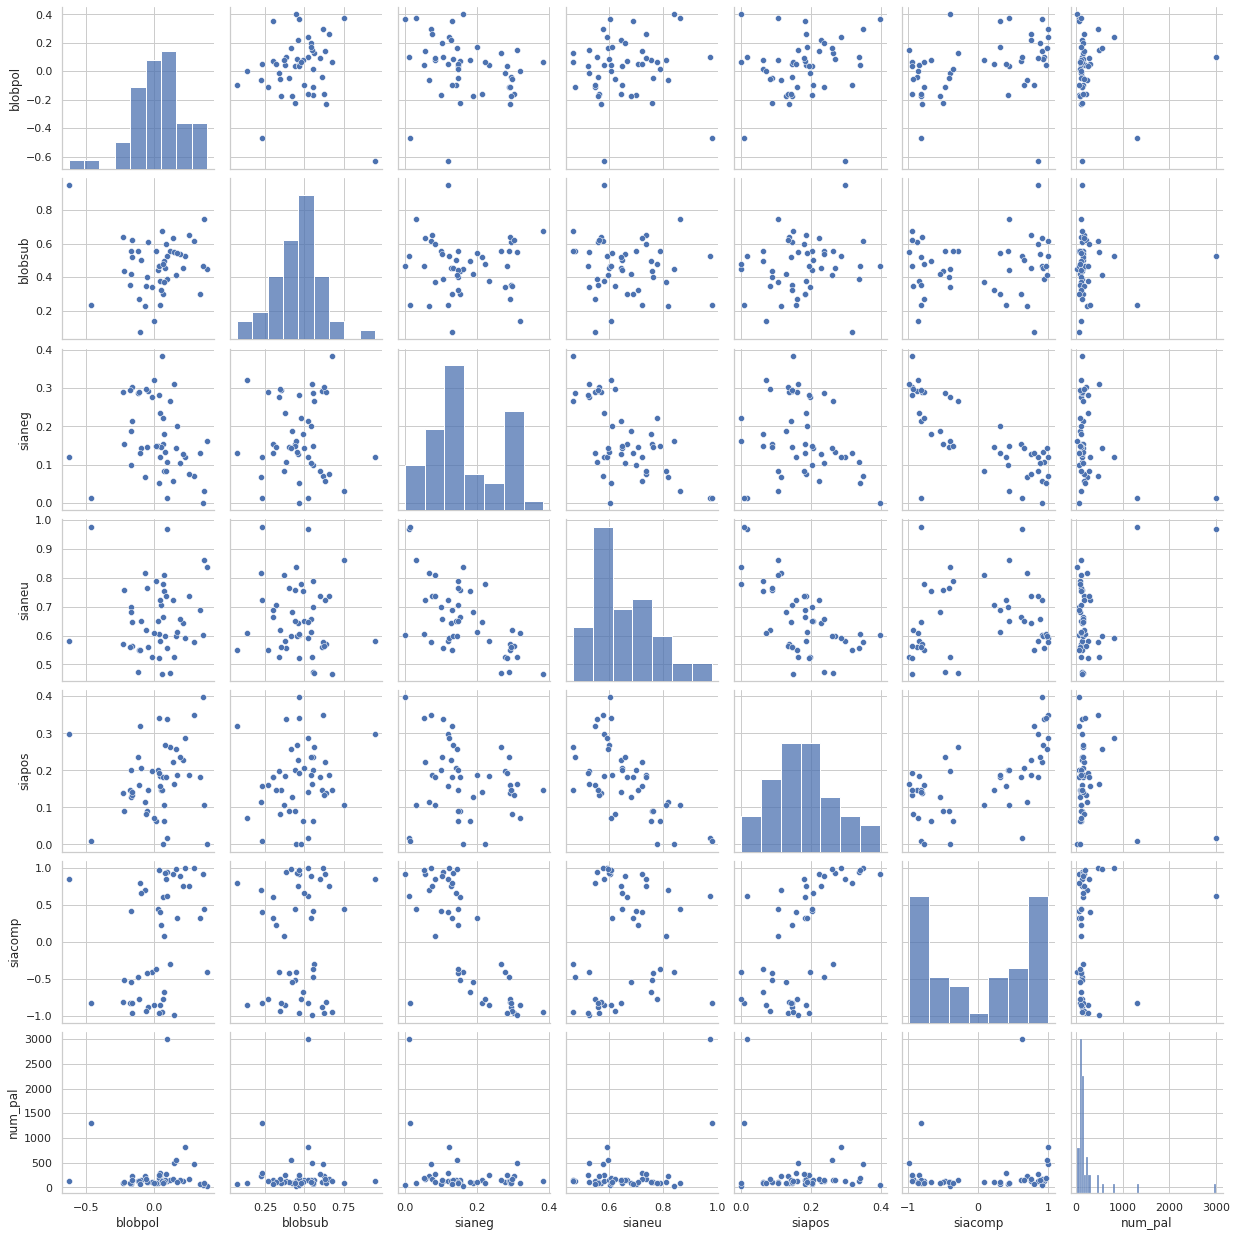

In [42]:
sns.pairplot(sentiments)

<AxesSubplot:xlabel='blobsub', ylabel='Count'>

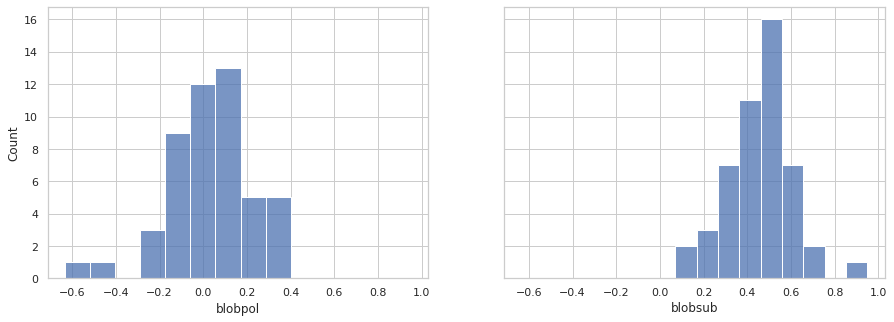

In [59]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5),sharey = True,sharex=True)
sns.histplot(sentiments["blobpol"],ax=axs[0])
sns.histplot(sentiments["blobsub"],ax=axs[1])

In [44]:
polaridad = sentiments.blobpol.mean()
subjetividad = sentiments.blobsub.mean()

In [45]:
polaridad, subjetividad

(0.030108485373706716, 0.46507984667804464)

<AxesSubplot:xlabel='siapos', ylabel='Count'>

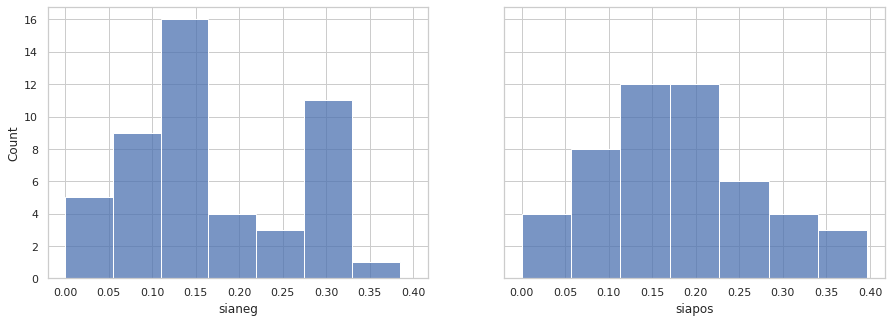

In [62]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5),sharey = True,sharex=True)
sns.histplot(sentiments["sianeg"],ax=axs[0])
sns.histplot(sentiments["siapos"],ax=axs[1])


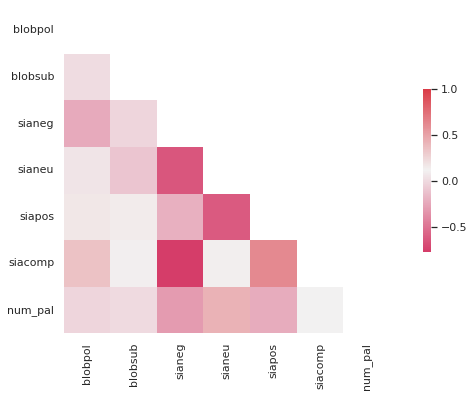

In [48]:
corr = sentiments.corr()
mascara = np.triu(np.ones_like(corr, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores
sns.heatmap(corr,  
            mask = mascara,
            cmap=color_map,
            square=True, #que los datos se vean como cuadrados
            vmax=1,
            cbar_kws={"shrink": .5} #barra lateral
);

In [56]:
corr

,blobpol,blobsub,sianeg,sianeu,siapos,siacomp,num_pal
blobpol,1.000000,0.011026,-0.229839,0.050986,0.170636,0.350473,-0.022716
blobsub,0.011026,1.000000,-0.022108,-0.098732,0.148718,0.100656,0.001413
sianeg,-0.229839,-0.022108,1.000000,-0.641573,-0.205780,-0.767700,-0.310516
sianeu,0.050986,-0.098732,-0.641573,1.000000,-0.618615,0.133999,0.425865
siapos,0.170636,0.148718,-0.205780,-0.618615,1.000000,0.615170,-0.225080
siacomp,0.350473,0.100656,-0.767700,0.133999,0.615170,1.000000,0.113533
num_pal,-0.022716,0.001413,-0.310516,0.425865,-0.225080,0.113533,1.000000


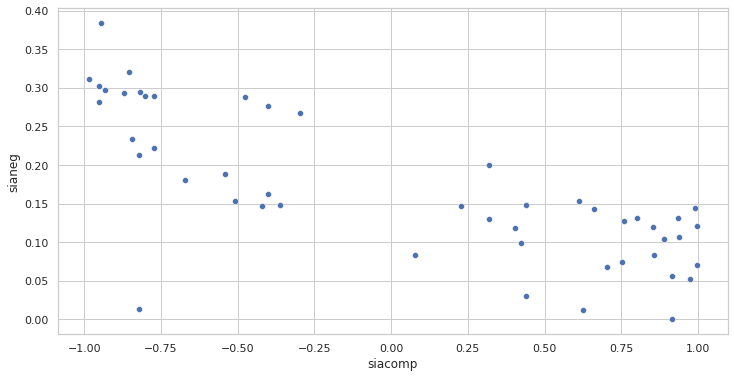

In [64]:
sns.scatterplot(x="siacomp", y="sianeg",data=sentiments);